In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import mp
#from mpl_toolkits.mplot3d import Axes3d

In [2]:
def F(n):
    if n==0:
        return 0
    if n==1:
        return 1
    else:
        return F(n-1)+F(n-2)

In [3]:
print(F(6))

8


In [10]:
def f(x):
    return mp.sin(x)**2

In [11]:
def df(x):
    return mp.sin(2*x)

In [12]:
def Newton(x0,f,df,it):
    x=[]
    x.append(x0)
    for i in range(1,it+1):
        x.append(x[-1]-f(x[-1])/df(x[-1]))
    return x[-1]

In [13]:
Newton(1,f,df,20)

mpf('4.1287569766555379e-7')

In [15]:
ls=[]
for i in range(1,51):
    ls.append(Newton(1/30,f,df,i))

In [16]:
def f(n):
    if n%2==0:
        return n**2
    else:
        return n**3
    

In [17]:
f(5)

125

In [18]:
def rev(l):
    return l[::-1]

In [19]:
rev([1,2,5,6])

[6, 5, 2, 1]

In [20]:
def av(l):
    return sum(l)/(len(l))

In [21]:
av([1,2,3,4])

2.5

In [22]:
def check(l,a):
    for i in range(len(l)):
        if a==l[i]:
            return True
    else:
        return False

In [23]:
l=[1,2,3,4,5,6]
print(check(l,7))

False


In [24]:
x=0
for k in range(1,10**5+1):
    x+=(-1)**(k+1)/(2*k-1)
4*x

3.1415826535897198

In [25]:
flist=[lambda x: np.sin(x),lambda x: np.cos(x),lambda x: np.sin(2*x),lambda x: np.cos(2*x)]

In [26]:
xs=[1,2,3,4,5]
ys=[10,98,426,1252,2930]

In [27]:
m=len(flist)-1
A=np.zeros([m+1,m+1])
b=np.zeros([m+1])
for k in range(m+1):
    b[k]= np.dot([flist[k](x) for x in xs], ys)
    for j in range(m+1):
        A[k,j]=sum([flist[k](x)*flist[j](x) for x in xs])
a=np.linalg.solve(A,b) 

In [28]:
def fit(x):
    res=0
    for k in range(m+1):
        res=res+flist[k](x)*a[k]
    return res

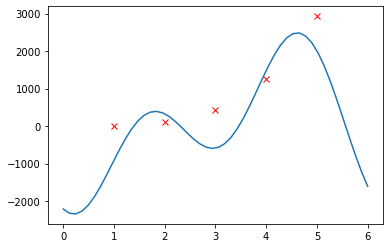

In [29]:
xd = np.linspace(0,6)
plt.plot(xd,[fit(x) for x in xd])
plt.plot(xs,ys,'rx')

In [71]:
#def pi(x,i,xs):
 #   xi = xs[i]
  #  print(xi)
   # res=1
    #for xj in xs:
     #   if xi != xj:
      #      res = res*(x-xj)/(xi-xj)
    #return res

In [106]:
def p(x,i,xs):
    xi = xs[i]
    res = 1
    for xj in xs:
        if xi != xj:
            res = res*(x-xj)/(xi-xj)
    return res

In [107]:
xs = [1,2,3,4,5]
ys = [10,98,426,1252,2930]

In [112]:
def Lagrange(x,xs,ys):
    i=0
    res=0
    for yi in ys:
        res = res + yi*p(x,i,xs)
        i=i+1
    return res

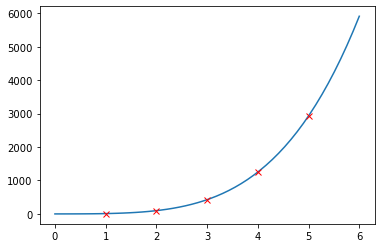

In [113]:
xd = np.linspace(0,6)
plt.plot(xd,[Lagrange(x,xs,ys) for x in xd]) # plot our interpolation function
plt.plot(xs,ys,"rx") # plots data too